# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
<font color=red>Viernes 5 de Septiembre a las 13:00 hs</font> 

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Series de Tiempo de la Republica Argentina [link](https://datosgobar.github.io/series-tiempo-ar-api/applications/) , obtener dos series de indicadores del Ministerio de Agricultura, Ganadería y Pesca. En total, dicho Ministerio tiene 72 series anuales y pueden buscar dos serie de indicadores de su interés.

{'data': [['2004-01-01', 286559.25], ['2005-01-01', 311114.5], ['2006-01-01', 329183.0], ['2007-01-01', 342965.25], ['2008-01-01', 360261.0], ['2009-01-01', 352861.5], ['2010-01-01', 350904.25], ['2011-01-01', 366448.5], ['2012-01-01', 359730.25], ['2013-01-01', 358468.75], ['2014-01-01', 357823.5], ['2015-01-01', 359569.25], ['2016-01-01', 354412.0]], 'count': 13, 'meta': [{'frequency': 'year', 'start_date': '2004-01-01', 'end_date': '2016-01-01'}, {'catalog': {'title': 'Datos Programación Macroeconómica'}, 'dataset': {'title': 'Empleo registrado del sector privado, por sector de actividad.', 'description': 'Empleo registrado del sector privado por sector de actividad. Cantidad de puestos de trabajo', 'issued': '2017-09-28', 'source': 'Secretaría de Trabajo, Empleo y Seguridad Social, Ministerio de Capital Humano'}, 'distribution': {'title': 'Empleo registrado del sector privado por sector de actividad. Valores con estacionalidad', 'downloadURL': 'https://infra.datos.gob.ar/catalog/ss

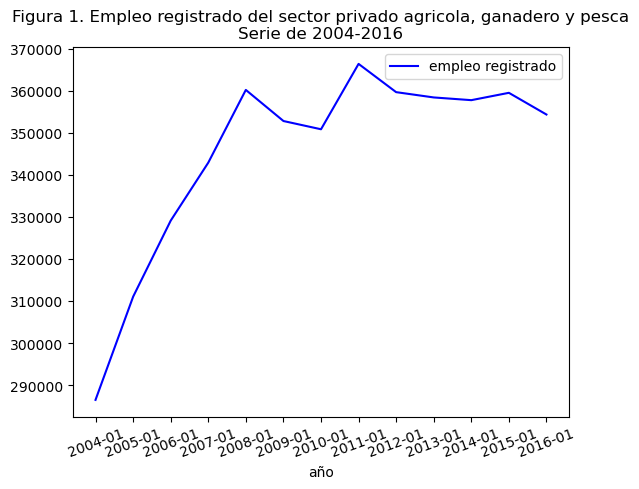

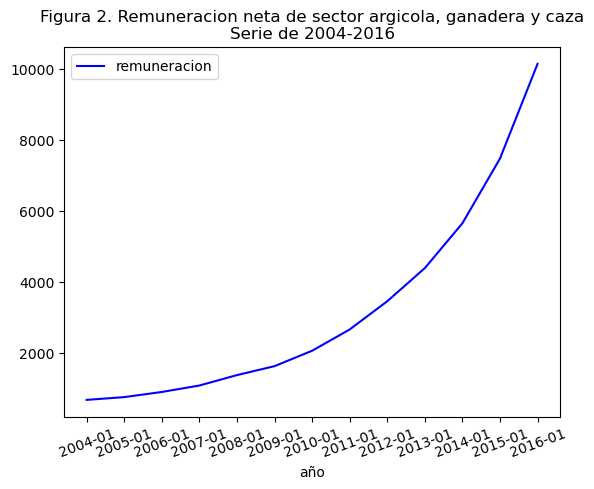

In [18]:
# Realizamos la importación de todos los paquetes necesarios, previamente instalados
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests


### Se realiza la importación de los datos de la primer serie temporal seleccionada, interactuando con la API de datos.gob.ar
# Cada serie cuenta con un ID y una URL detallados en una base dentro de la API para poder realizar las consultas de la misma

url_arg = "https://apis.datos.gob.ar/series/api/series/?collapse=year&collapse_aggregation=avg&end_date=2016-01-01&ids=155.1_ACULTURSCA_C_0_0_27&limit=5000&start_date=2004-01-01&format=json"
response = requests.get(url_arg)
datos = response.json() 
print(datos) # Visualizamos los datos obtenidos
# Hasta aquí tenemos la serie temporal importada en formato json, a continuación la transformamos en un dataframe de pandas para manipularlo
d  = datos['data']
data_arg = pd.DataFrame(d)
data_arg.columns = ['fecha', 'empleo registrado'] # Renombramos las columnas del dataframe
print(data_arg) # Visualizamos el data frame creado

# Replicamos los pasos previos para la segunda serie temporal (las variables deben ser nombradas de manera distinta para no pisar los pasos previos) 
url_arg1 = "https://apis.datos.gob.ar/series/api/series/?collapse=year&collapse_aggregation=avg&ids=328.2_AGRI_GANADURA__32&limit=5000&format=json"
response1 = requests.get(url_arg1)
datos1 = response1.json()
print(datos1) # Visualizamos los datos obtenidos
d1 = datos1['data']
data_arg_1 = pd.DataFrame(d1)
data_arg_1.columns = ['fecha', 'remuneracion']
print(data_arg_1) # Visualizamos el data frame creado

# A continuación realizamos una gráfica exploratoria de los datos obtenidos para ambas series temporales

# Primera serie temporal: Empleo registrado del sector privado agricola, ganadero y pesca. Serie de 2004-2016

data_arg['fecha'] = pd.to_datetime(data_arg['fecha'])

# Creamos la figura y los axes
fig, ax = plt.subplots()  # Crear objetos

# Definimos series
ax.plot(data_arg['fecha'], data_arg['empleo registrado'], label="empleo registrado", color = 'blue')

# Modificamos labels y título
ax.set_xlabel("año")
ax.set_title("Figura 1. Empleo registrado del sector privado agricola, ganadero y pesca\n" "Serie de 2004-2016")

# Configuramos las etiquetas del eje X para que solo muestren los meses de enero
data_arg_january = data_arg[data_arg['fecha'].dt.month == 1]  # Filtramos solo los meses de enero
ax.set_xticks(data_arg_january['fecha'])  # Establecemos los ticks solo en enero
ax.set_xticklabels(data_arg_january['fecha'].dt.strftime('%Y-%m'))  # Mostramos solo el año y mes en formato 'YYYY-MM'
plt.xticks(rotation=20)

# Agregamos leyenda
ax.legend()

# Mostramos la figura
plt.show()


# Segunda serie temporal: Remuneracion neta de sector argicola, ganadera y caza. Serie de 2004-2016

data_arg_1['fecha'] = pd.to_datetime(data_arg_1['fecha'])

# Creamos la figura y los axes
fig, ax = plt.subplots()  # Crear objetos

# Definimos series
ax.plot(data_arg_1['fecha'], data_arg_1['remuneracion'], label="remuneracion", color = 'blue')

# Modificamos labels y título
ax.set_xlabel("año")
ax.set_title("Figura 2. Remuneracion neta de sector argicola, ganadera y caza\n" "Serie de 2004-2016")

# Configuramos las etiquetas del eje X para que solo muestren los meses de enero
data_arg_january = data_arg_1[data_arg['fecha'].dt.month == 1]  # Filtramos solo los meses de enero
ax.set_xticks(data_arg_january['fecha'])  # Establecemos los ticks solo en enero
ax.set_xticklabels(data_arg_january['fecha'].dt.strftime('%Y-%m'))  # Mostramos solo el año y mes en formato 'YYYY-MM'
plt.xticks(rotation=20)

# Agregamos leyenda
ax.legend()

# Mostramos la figura
plt.show() 


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva ambas series de indicadores del Ministerio de Ganaderia y  presente en una tabla en su reporte. Dicha tabla debe mostrar: numero de observaciones, media, desvío standard, min, p25, mediana, p75 y max. Comente la tabla en **el reporte**.

In [19]:
# Realizamos la unión de las 2 series temporales en un unico dataframe, a partir de la coincidencia de la columna de fecha entre ambas series
# Lo que realiza el código en este caso es agregar la columna de interes segunda serie temporal (remuneraciones) en el dataframe de empleo, buscando las coincidencias de fecha de la segunda serie con las de la primera (en este caso sabemos que la coincidencia es total)
data_merge = data_arg.merge(data_arg_1, on=data_arg_1.columns[0], how='left')
print(data_merge) # Visualizamos la fusión

# Realizamos la tabla descriptiva unicamente de las 2 variables que interesan del nuevo dataframe fusionado (no la fecha). Redondeamos los decimales a 2
summary = data_merge[['empleo registrado', 'remuneracion']].describe().round(2)
print(summary) # Visualizamos el resumen

# Exportamos el resumen a excel para agregarlo en  el informe 

summary.to_excel('summary.xlsx', index=False)


        fecha  empleo registrado  remuneracion
0  2004-01-01          286559.25    678.695505
1  2005-01-01          311114.50    756.855121
2  2006-01-01          329183.00    901.630397
3  2007-01-01          342965.25   1083.025154
4  2008-01-01          360261.00   1376.153831
5  2009-01-01          352861.50   1628.747892
6  2010-01-01          350904.25   2062.644887
7  2011-01-01          366448.50   2660.777163
8  2012-01-01          359730.25   3454.922429
9  2013-01-01          358468.75   4390.282460
10 2014-01-01          357823.50   5652.323349
11 2015-01-01          359569.25   7473.330000
12 2016-01-01          354412.00  10137.012536
       empleo registrado  remuneracion
count              13.00         13.00
mean           345407.77       3250.49
std             23218.14       2934.22
min            286559.25        678.70
25%            342965.25       1083.03
50%            354412.00       2062.64
75%            359569.25       4390.28
max            366448.50      

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos de tendencia distintos usando la librería Matplotlib (repasen Clase 3). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*.
Recuerde los principios de visualización de datos y comente dichas figuras en su reporte.

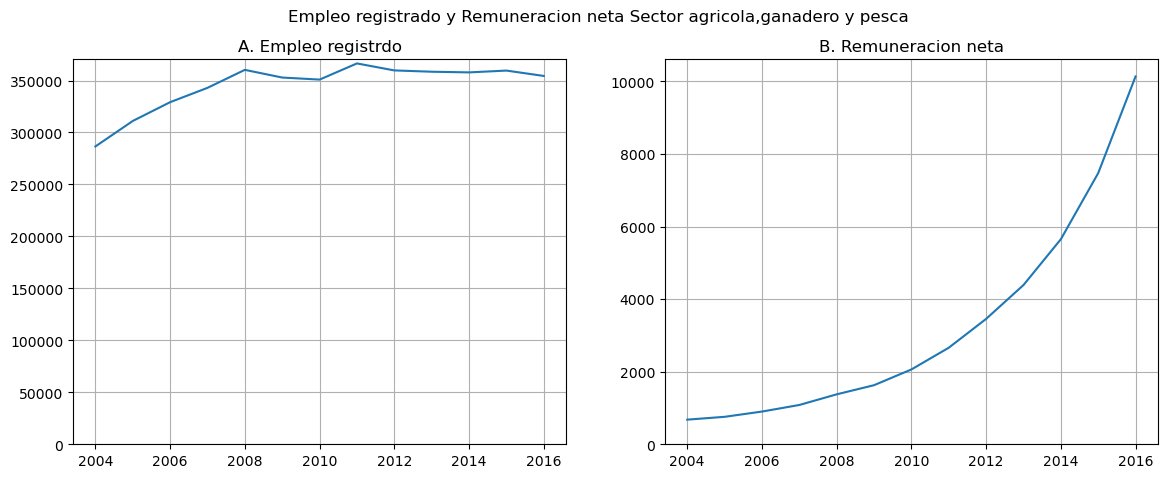

In [20]:
# Gráfico estilo pyplot

# Definimos  vectores  de datos  para  serie 1(empleo registrado)
y1 = data_merge["empleo registrado"]
x1 = data_merge["fecha"]
# Definimos  vectores  de datos  para  serie 2( remuneracion)
y2 = data_merge["remuneracion"]
x2 = data_merge["fecha"]

 # Definimos la ruta de la carpeta donde se guardará el gráfico
carpeta = 'C:/Users/franc/OneDrive/Escritorio/BigDataUBA-Grupo-1/trabajos_practicos/tp_1'
            # '/content/drive/MyDrive/big data/Figura.png'

# Verifica si la carpeta existe, si no, créala
if not os.path.exists(carpeta):
    os.makedirs(carpeta)

# Creamos el gráfico: 
plt.figure(figsize=(14, 5))

# Definimos primer panel
plt.subplot(121) # subplot(nrows, ncols, index, **kwargs) donde nrows=1, ncols=2, index=1
plt.plot(x1, y1)
plt.title("A. Empleo registrdo")
plt.grid(True)
plt.ylim(bottom=0) # Seteamos el eje y en 0 

# Definimos segundo panel
plt.subplot(122)
plt.plot(x2, y2)
plt.title("B. Remuneracion neta")
plt.grid(True) 
plt.ylim(bottom=0) # Seteamos el eje y en 0  

# Definimos título general de la figura
plt.suptitle("Empleo registrado y Remuneracion neta Sector agricola,ganadero y pesca")

# Guardamos el gráfico en la carpeta (no usamos la funcion .show() para ahora guardarla)
plt.savefig(os.path.join(carpeta, 'figura_3.png'), bbox_inches='tight', dpi=300)

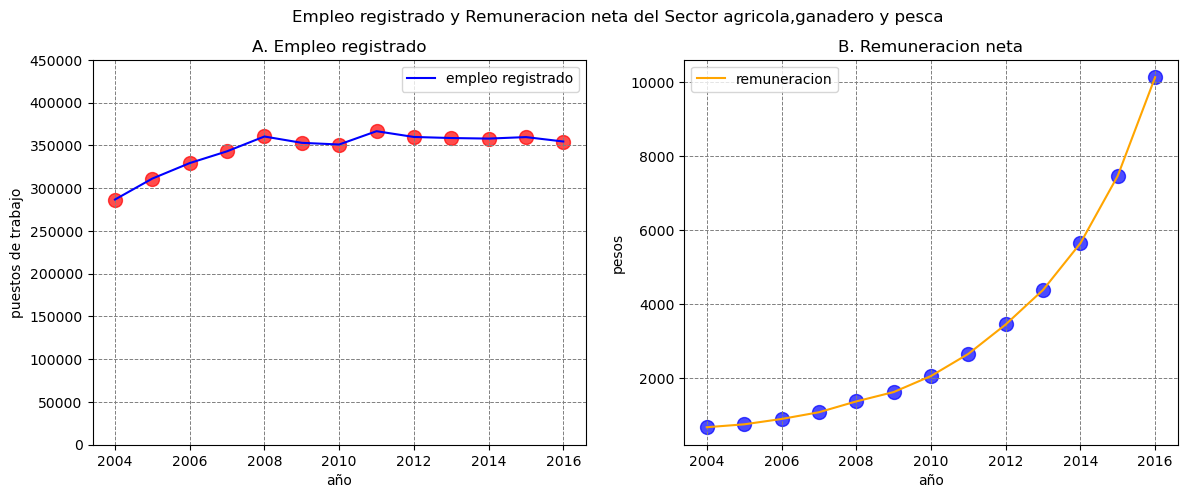

In [24]:
# Gráfico estilo orientado-objetos 

# Creamos la figura
fig, ax = plt.subplots(figsize=(14, 5), ncols=2, nrows=1)

# Definimos primer panel

   # Definimos series
ax[0].plot(x1, y1, label="empleo registrado", color = 'blue')
   # Modificamos labels y título
ax[0].set_xlabel("año")
ax[0].set_ylabel("puestos de trabajo")
ax[0].set_title("A. Empleo registrado")
  # Agregamos leyenda
ax[0].legend()
  # Agregamos regilla
ax[0].grid(True, linestyle='--', linewidth=0.7, color='gray')
  # Agregamos dispercion
ax[0].scatter(x1, y1, s=100, c='red', marker='o', alpha=0.7)
  # Seteamos el eje y en 0 
ax[0].set_ylim(bottom=0)
ax[0].set_ylim(top=450000)

# Definimos segundo panel

# Definimos series
ax[1].plot(x2, y2, label="remuneracion", color = 'orange')
   # Modificamos labels y título
ax[1].set_xlabel("año")
ax[1].set_ylabel("pesos")
ax[1].set_title("B. Remuneracion neta")
  # Agregamos leyenda
ax[1].legend()
  # Agregamos regilla
ax[1].grid(True, linestyle='--', linewidth=0.7, color='gray')
  # Agregamos dispercion
ax[1].scatter(x2, y2, s=100, c='blue', marker='o', alpha=0.7)
# Definimos título general de la figura
fig.suptitle("Empleo registrado y Remuneracion neta del Sector agricola,ganadero y pesca")
# Guardamos el gráfico en la carpeta (no usamos la funcion .show() para ahora guardarla)
plt.savefig(os.path.join(carpeta, 'figura_4.png'), bbox_inches='tight', dpi=300)

### Parte B

#### Ejercicio 4 - Documentando noticias locales y en el extranjero
Eligan dos sitios web de noticias: uno de Argentina y uno del extranjero (puede ser en castellano o en inglés como el *New York Times*).

Utilicen herramientas de webscraping para obtener los **links** de las noticias de la portada en ambos diarios. Guarden cada titular con los links obtenidos en un dataframe. Por lo tanto, debe quedarles un dataframe de 4 columnas: una columna para noticias locales, otra para su link, otra columna de noticias extranjeras y una ultima columna de sus links. Luego, expórtenlo a un archivo de excel.

En el reporte este esta parte B:
1) Inserten una captura de pantalla de la pagina del diario extranjero y en Argentina de las cuales hacen el ejercicio de extraer titulares y sus links correspondientes. Esto servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.
2) Comenten brevemente (1 párrafo) las diferencias/similitudes al extraer titulares en diarios de Argentina versus diario extranjero
3) Comenten brevemente (1 párrafo) las dificultades y cómo resolvieron dichas dificultades.

*Nota*: es posible que logren obtener los links a las noticias sin el dominio: por ejemplo "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)


In [14]:
# Se realiza la importación de los paquetes necesarios
 
import requests
from bs4 import BeautifulSoup
import pandas as pd


# Se realiza la elección de los sitios web
argentina_news_url = 'https://www.clarin.com/' # Clarín in Argentina
foreign_news_url = 'https://edition.cnn.com/' # CNN para noticias extranjeras

# Explicamos la elección de sitios web.
print(f"Selected Argentinian news website: {argentina_news_url}")
print("Reasoning:Clarín es uno de los periódicos más leídos y respetados de Argentina, y ofrece una cobertura integral de las noticias nacionales..")
print(f"Selected foreign news website: {foreign_news_url}")
print("Reasoning: cnn  es una organización de noticias reconocida mundialmente con una sólida reputación por sus informes objetivos y profundos sobre eventos internacionales..")

# Primero trabajamos con la página web del medio de comunicación local

# Importamos el html de la página web de Clarín
response = requests.get(argentina_news_url)
soup_clarin = BeautifulSoup(response.content, 'html.parser')

# Creamos listas vacias para almacenar los titulares 
argentina_headlines = []
argentina_links = []

# Realizamos la importación del código html de

# Inspeccionamos el HTML del sitio web de Clarín para encontrar las etiquetas y atributos relevantes para los titulares y enlaces.
# Ejemplo: Suponiendo que los titulares están en etiquetas <h2> dentro de etiquetas <a>
# Esta parte podría requerir ajustes según la estructura real del sitio web.
for h2_tag in soup_clarin.find_all('h2'):
    a_tag = h2_tag.find('a')
#verificamos que sean titulares
    if a_tag and a_tag.text and a_tag['href']:
        argentina_headlines.append(a_tag.text.strip())
        argentina_links.append(a_tag['href'])

# Muestra los primeros titulares y enlaces extraídos para verificar
print("First 5 Argentinian Headlines:")
for headline in argentina_headlines[:5]:
    print(headline)

print("\nFirst 5 Argentinian Links:")
for link in argentina_links[:5]:
    print(link)

# A continuación trabajamos con la pagina web del medio de comunicación internacional: 

foreign_news_url = 'https://edition.cnn.com/'
response = requests.get(foreign_news_url)
soup_cnn = BeautifulSoup(response.content, 'html.parser')

foreign_headlines = []
foreign_links = []


# Inspeccionamos la estructura HTML de CNN para encontrar titulares y enlaces.
# CNN suele usar etiquetas 'span' o 'h3' para los titulares, dentro de etiquetas 'a' para los enlaces, a menudo anidadas en divs con clases específicas.
# Necesitamos buscar patrones que contengan de forma fiable tanto el texto del titular como el enlace.

# Intento 1: Busque enlaces dentro de clases específicas que se usan a menudo para titulares en CNN.
# Tras una inspección rápida (necesaria para mayor precisión), clases como 'container__link' o similares son comunes.
for link_tag in soup_cnn.find_all('a', class_='container__link'): # por ejemplo, esta necesitaria un ajuste
    headline_element = link_tag.find(['span', 'h3']) # Los titulares suelen estar en span o h3 dentro del enlace
    if headline_element and headline_element.text:
        headline_text = headline_element.text.strip()
        link = link_tag.get('href')

        if link and headline_text:
            # nos aseguramos de que el enlace sea absoluto, queremos urls completos
            if link.startswith('/'):
                foreign_links.append(f"https://edition.cnn.com{link}")
            else:
                foreign_links.append(link)
            foreign_headlines.append(headline_text)


# El primer intento no arrojó resultados, probamos con otro enfoque.
# Segundo intento: Buscamos enlaces en las etiquetas "h2" o "h3", que podrían contener el enlace directamente.
#como no se encontro resultados lo ejecutamos sobre ese if, buscamos todas las etiquetas h2, h3
if not foreign_headlines:
    for heading_tag in soup_cnn.find_all(['h2', 'h3']):
        a_tag = heading_tag.find('a')
        if a_tag and a_tag.text and a_tag['href']:
             headline_text = a_tag.text.strip()
             link = a_tag.get('href')
             if link.startswith('/'):
                foreign_links.append(f"https://edition.cnn.com{link}")
             else:
                foreign_links.append(link)
             foreign_headlines.append(headline_text)


# Imprimimos el número de titulares extranjeros y los primeros 5 para verificar
print(f"Scraped {len(foreign_headlines)} foreign headlines.")
print("First 5 Foreign Headlines:")
for headline in foreign_headlines[:5]:
    print(headline)

print("\nFirst 5 Foreign Links:")
for link in foreign_links[:5]:
    print(link)

# A continuación creamos el dataframe con los titulares de las noticias y sus url, tanto del medio local como el internacional

# Determinamos la longitud mínima de las listas
min_len = min(len(argentina_headlines), len(argentina_links), len(foreign_headlines), len(foreign_links))

# Truncamos las listas a la longitud mínima
argentina_headlines_truncated = argentina_headlines[:min_len]
argentina_links_truncated = argentina_links[:min_len]
foreign_headlines_truncated = foreign_headlines[:min_len]
foreign_links_truncated = foreign_links[:min_len]

# Creamos un diccionario a partir de las listas truncadas
data = {
    'Noticias Locales': argentina_headlines_truncated,
    'Link Local': argentina_links_truncated,
    'Noticias Extranjeras': foreign_headlines_truncated,
    'Link Extranjero': foreign_links_truncated
}

# Creamos el DataFrame de pandas a partir del diccionario
df_news = pd.DataFrame(data)

# Visualizamos el encabezado del DataFrame
display(df_news.head())

# Finalmente exportamos el dataframe creado a formato excel

df_news.to_excel('news_headlines.xlsx', index=False)


Selected Argentinian news website: https://www.clarin.com/
Reasoning:Clarín es uno de los periódicos más leídos y respetados de Argentina, y ofrece una cobertura integral de las noticias nacionales..
Selected foreign news website: https://edition.cnn.com/
Reasoning: cnn  es una organización de noticias reconocida mundialmente con una sólida reputación por sus informes objetivos y profundos sobre eventos internacionales..
First 5 Argentinian Headlines:
Javier Milei y todas sus medidas
Elecciones 2025
Dólar hoy
Argentina vs Venezuela

First 5 Argentinian Links:
https://www.clarin.com/politica/javier-milei-medidas-vivo-presidente-angeles-gobierno-busca-sostener-veto-emergencia-discapacidad_0_zckSETvtYB.html
https://www.clarin.com/politica/elecciones-2025-argentina-vivo-kicillof-cierra-hoy-campana-fuerza-patria-legislativas-provincia-actos-secciones-clave_0_LBXhp6v6SK.html
https://www.clarin.com/economia/dolar-hoy-dolar-blue-vivo-cotiza-oficial-precio-paralelo-jueves-4-septiembre-minuto-mi

,Noticias Locales,Link Local,Noticias Extranjeras,Link Extranjero
0,Javier Milei y todas sus medidas,https://www.clarin.com/politica/javier-milei-m...,17th-century painting,https://edition.cnn.com/2025/09/03/americas/ar...
1,Elecciones 2025,https://www.clarin.com/politica/elecciones-202...,Vuelta cycling race fails,https://edition.cnn.com/2025/09/03/sport/cycli...
2,Dólar hoy,https://www.clarin.com/economia/dolar-hoy-dola...,Lisbon funicular,https://edition.cnn.com/2025/09/03/europe/lisb...
3,Argentina vs Venezuela,https://www.clarin.com/deportes/hora-juega-sel...,Graham Greene dies,https://edition.cnn.com/2025/09/03/entertainme...
